<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/25_JointGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: JointGrid

In [ ]:
import seaborn as sns

In [ ]:
cars = sns.load_dataset('mpg')

In [ ]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basics

In [ ]:
sns.set_style('darkgrid')

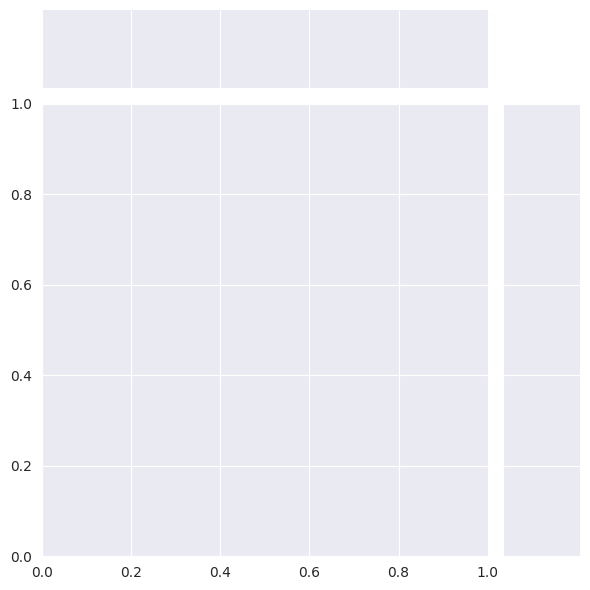

In [ ]:
g = sns.JointGrid()

In [ ]:
type(g)

seaborn.axisgrid.JointGrid

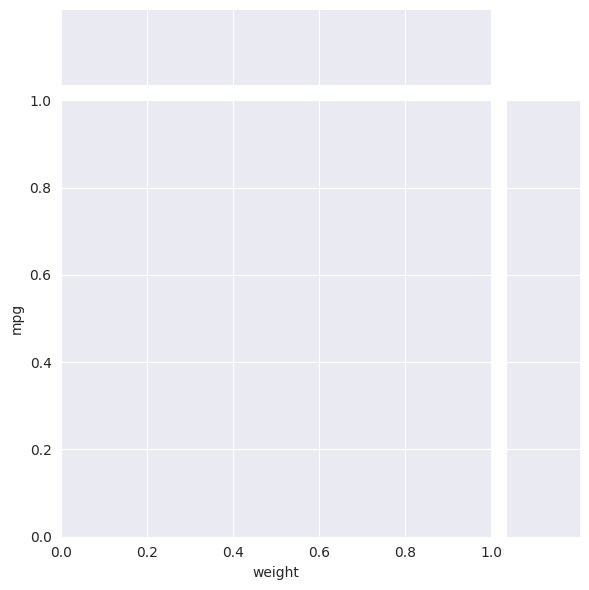

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')

### `.plot()`

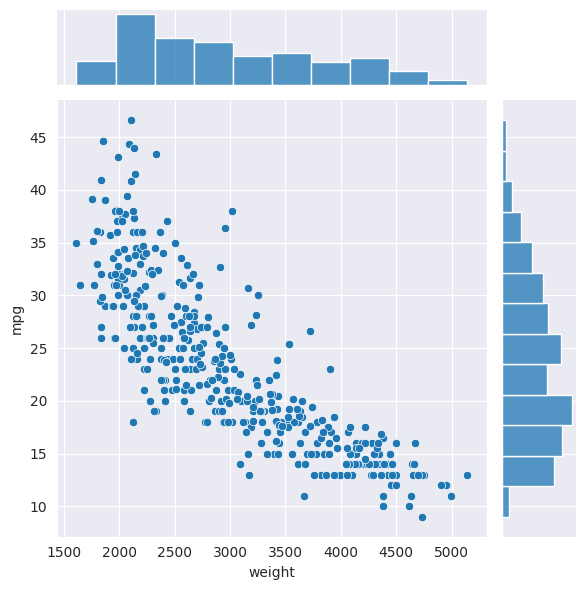

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot)

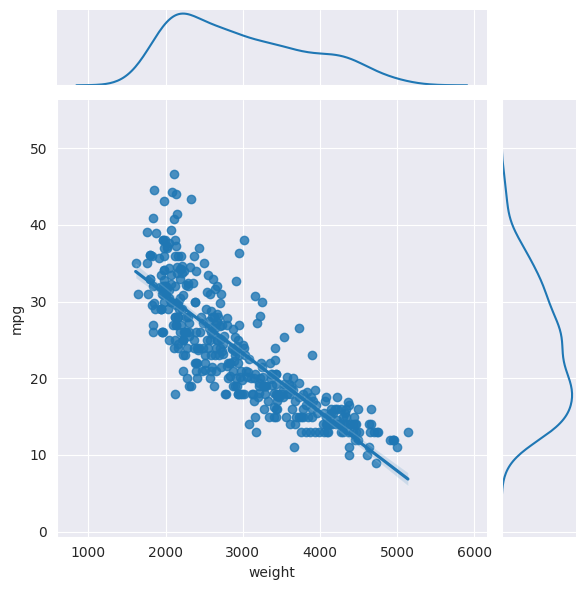

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot)

## Joint and Marginal Plots

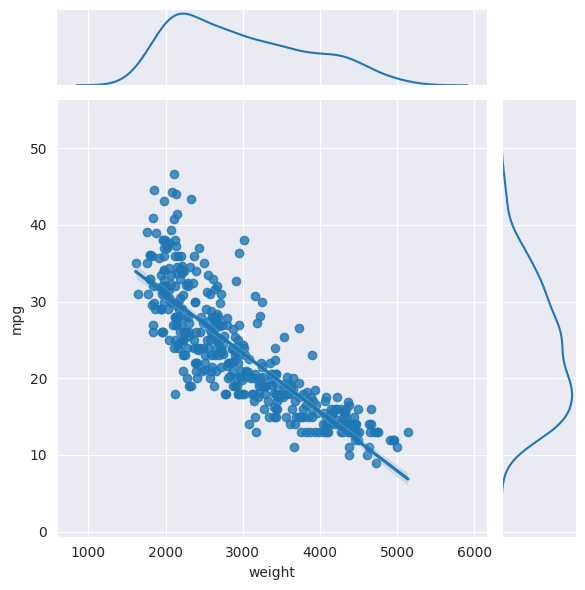

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot)

### `.plot_joint(), .plot_marginals()`

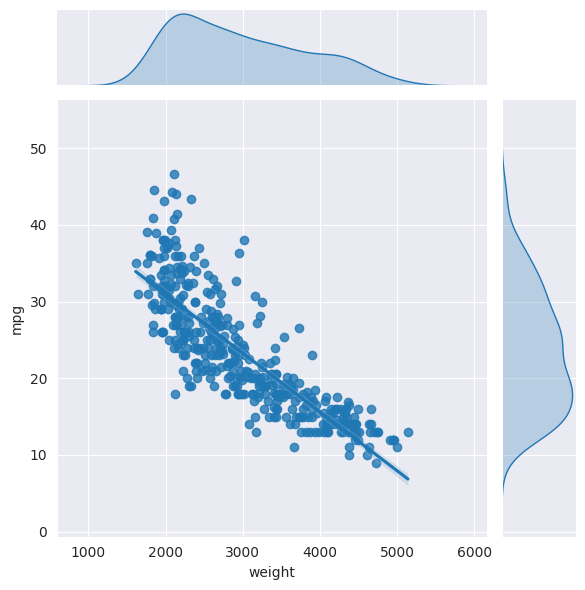

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot, fill=True)  #syntax used to style plot types separately

### JointGrid Axes

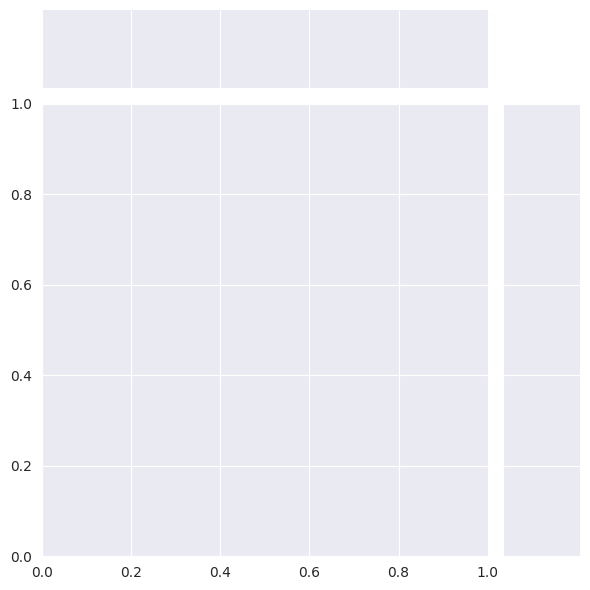

In [ ]:
g = sns.JointGrid()

In [ ]:
type(g.ax_marg_x)

matplotlib.axes._axes.Axes

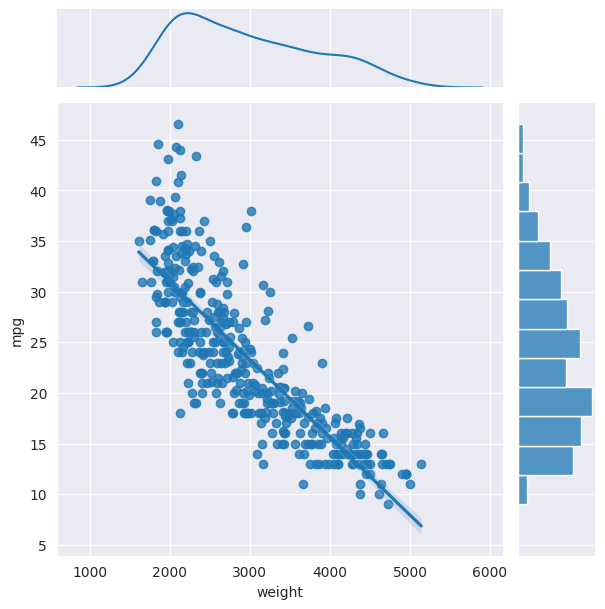

In [ ]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x)
sns.histplot(y=y, ax=g.ax_marg_y)

## Hue

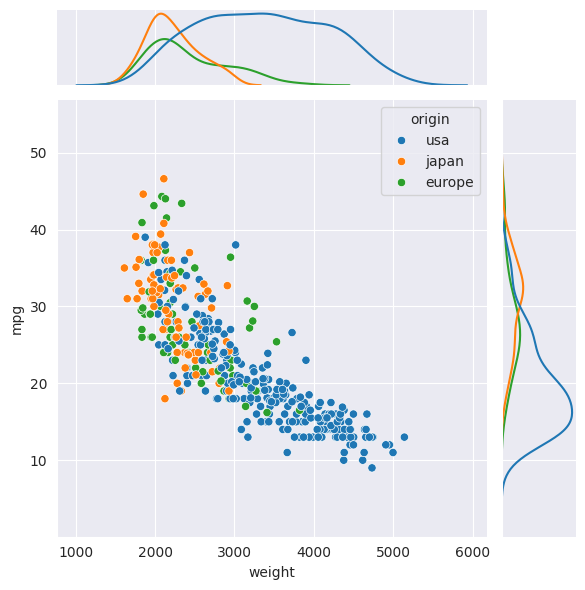

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg', hue='origin')
g.plot(sns.scatterplot, sns.kdeplot)

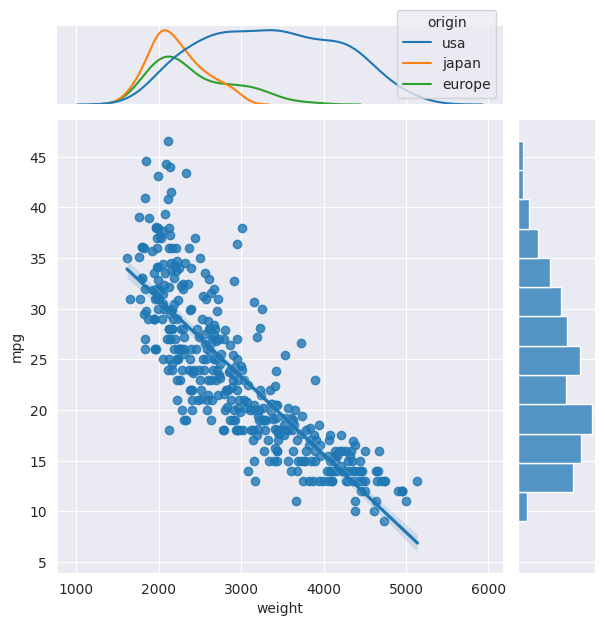

In [ ]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x, hue=cars.origin)
sns.histplot(y=y, ax=g.ax_marg_y)

## Styling

### General Styling

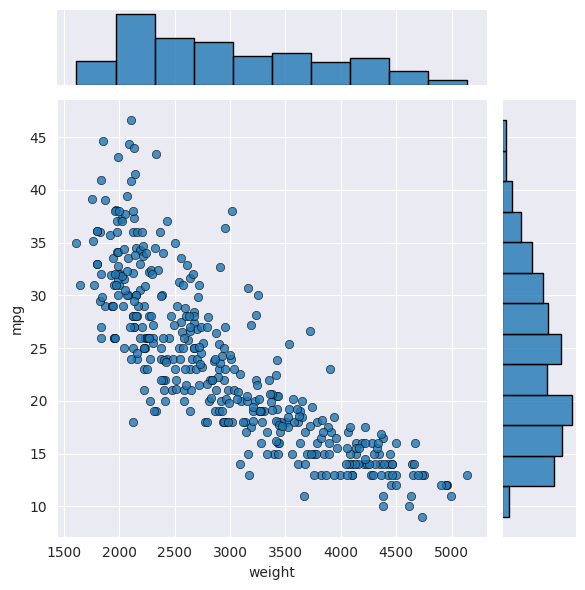

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha=0.8, edgecolor='black')

### Plot-specific Keywords

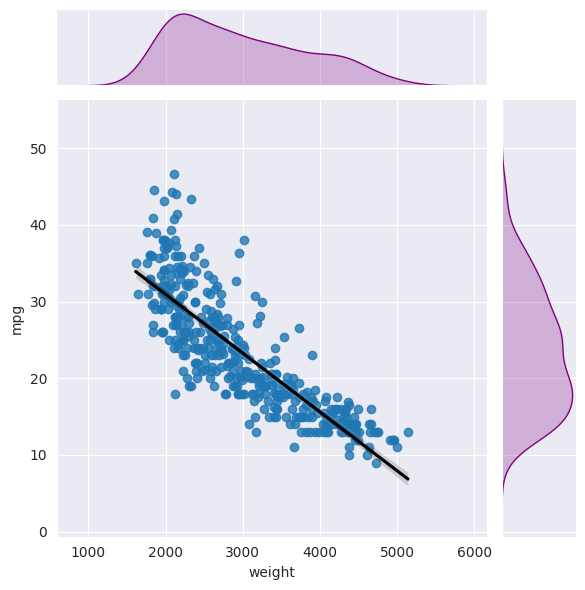

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, line_kws={'color': 'black'})
g.plot_marginals(sns.kdeplot, fill=True, color='purple')

### Joint Grid Properties

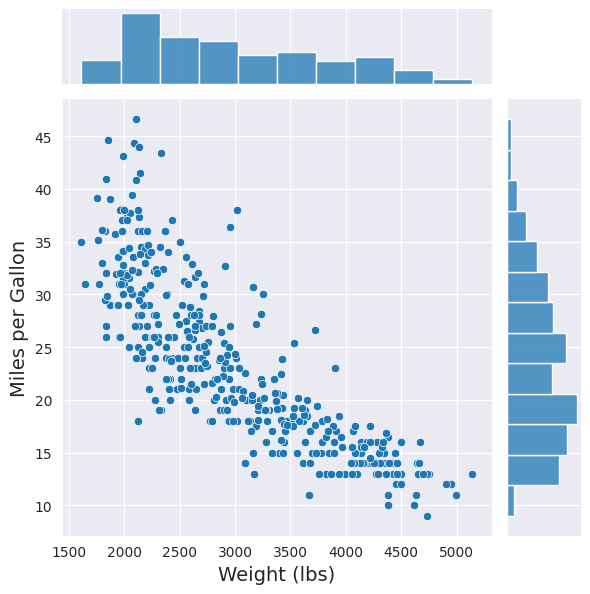

In [ ]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Weight (lbs)', ylabel='Miles per Gallon', fontsize=14)
g.savefig('Joint_Grid_Example.png')

In [ ]:
#!ls J*

## Thumbnail and Overlays

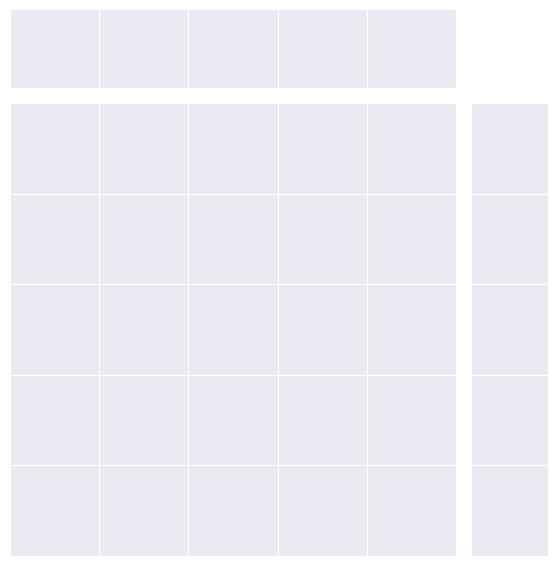

In [ ]:
g = sns.JointGrid()
ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([])
g.savefig('25jointgrid_image_blank.png', dpi=200)

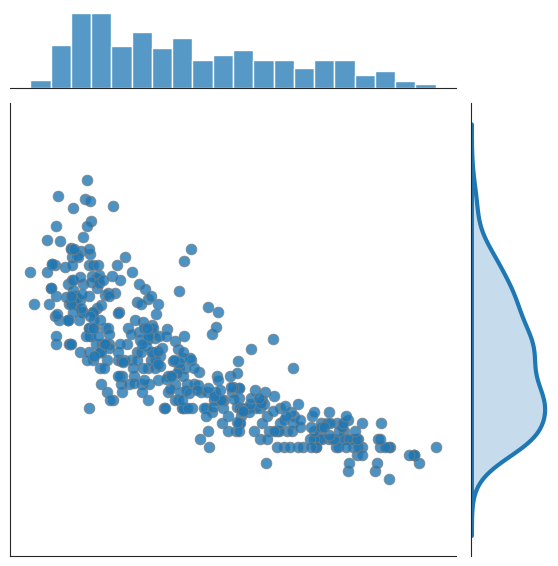

In [ ]:
g = sns.JointGrid()
x,y = cars.weight, cars.mpg
sns.scatterplot(x=x, y=y, ax=g.ax_joint, s=60, alpha=0.8, ec='gray')
sns.histplot(x=x, ax=g.ax_marg_x, bins=20)
sns.kdeplot(y=y, ax=g.ax_marg_y, fill=True, lw=3)
g.set_axis_labels(xlabel='', ylabel='')

ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
g.savefig('25jointgrid_image_differentPlots.png', dpi=200)

### Thumbnail

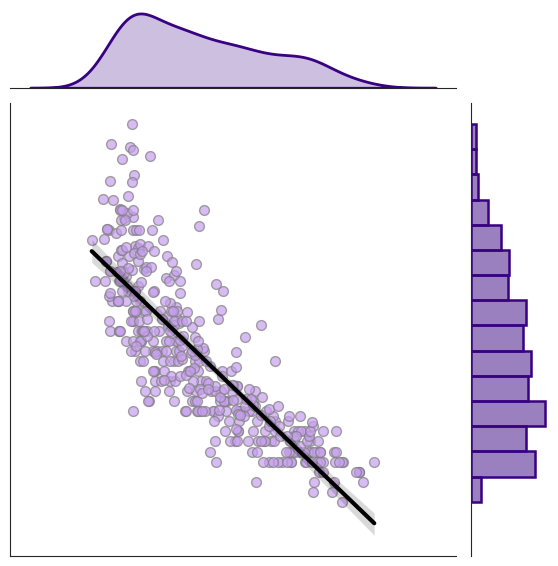

In [ ]:
sns.set_style('white')

g = sns.JointGrid()
x,y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint, ci=99,
            scatter_kws={'color': 'xkcd:lavender', 'alpha': 0.7, 'ec': 'gray', 's': 50},
            line_kws={'color': 'black', 'lw': 3}
           )
sns.kdeplot(x=x, ax=g.ax_marg_x, fill=True, color='xkcd:indigo', lw=2 )
sns.histplot(y=y, bins=15, ax=g.ax_marg_y, lw=2, color='xkcd:indigo', alpha=0.5, ec='xkcd:indigo')
g.set_axis_labels(xlabel='', ylabel='')

ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
g.savefig('25jointgrid_image_thumb.png', dpi=200)